<a href="https://colab.research.google.com/github/have-not/tutorial-ml-exercises/blob/master/2_1%262_2_Mnist_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 実習2-1
### Multil-Layer Perceptron(MLP)でMnistデータの分類

### 参考
(https://github.com/keras-team/keras/tree/master/examples)

In [1]:

import os  #OSの機能を使用するため
import pandas as pd  #pandasを用いたデータ処理をするため
import keras #Kerasを使用するため
from keras.datasets import mnist #MNISTデータを使用するため
from keras.models import Sequential #Neural Networkを作製するため。
from keras.layers import Dense, Dropout #フルコネクト(fc)層の作製と、dropoutを使用するため
from keras.optimizers import SGD #確率的勾配降下法を使用するため
import matplotlib.pyplot as plt #画像描画のため
import time #計算にかかった時間を表示するため
import numpy as np

# SGDをRMSpropやAdamに変更することも可能

Using TensorFlow backend.


In [0]:
#バッチサイズ、分類クラス数、epoch数を設定
batch_size = 128
num_classes = 10
epochs = 10

In [3]:
# Mnistデータをダウンロード。既に訓練データとテストデータに分割されている。
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train.shape, y_train.shape, X_test.shape, y_test.shape
#X_train: 学習データ
#y_train: 学習ラベル
#X_test: テストデータ
#y_test: テストラベル

11493376/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Text(0.5, 1.0, 'Mnist data')

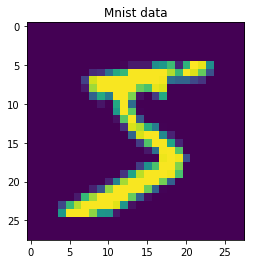

In [4]:
plt.imshow(X_train[0,0:28,0:28])#画像データのスライス
plt.title('Mnist data')

#Matplotlibについては以下のHPが役に立つかも
#https://matplotlib.org/gallery/index.html

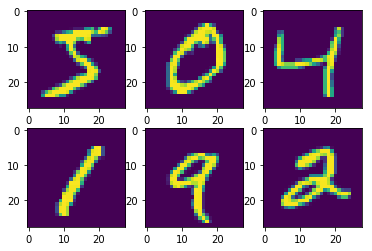

In [5]:
#データを最初から順番に並べて表示
plt.subplot(231)
plt.imshow(X_train[0,:28,:28])

plt.subplot(232)
plt.imshow(X_train[1,:28,:28])

plt.subplot(233)
plt.imshow(X_train[2,:28,:28])

plt.subplot(234)
plt.imshow(X_train[3,:28,:28])

plt.subplot(235)
plt.imshow(X_train[4,:28,:28])

plt.subplot(236)
plt.imshow(X_train[5,:28,:28])

plt.show()

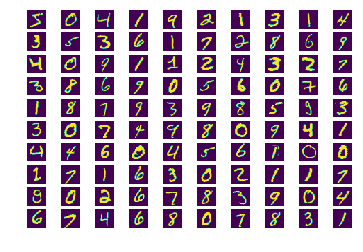

In [6]:
#10x10でデータを表示

for i in range(100):
    plt.subplot(10,10,i + 1)
    plt.axis("off")
    plt.imshow(X_train[i,:28,:28])
    
plt.show()

In [7]:
#x_trainのデータとy_trainのデータの対応を見る
y_train[0:100]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9, 4, 0,
       9, 1, 1, 2, 4, 3, 2, 7, 3, 8, 6, 9, 0, 5, 6, 0, 7, 6, 1, 8, 7, 9,
       3, 9, 8, 5, 9, 3, 3, 0, 7, 4, 9, 8, 0, 9, 4, 1, 4, 4, 6, 0, 4, 5,
       6, 1, 0, 0, 1, 7, 1, 6, 3, 0, 2, 1, 1, 7, 9, 0, 2, 6, 7, 8, 3, 9,
       0, 4, 6, 7, 4, 6, 8, 0, 7, 8, 3, 1], dtype=uint8)

In [0]:
#データの値を正規化
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

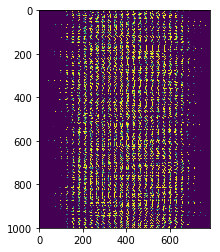

In [9]:
#一次元配列のデータに変換します。
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
plt.imshow(X_train[0:1000, 0:784])
plt.show()

In [10]:
#データ数の確認
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [11]:
#各数字がそれぞれ何個ずつあるかカウント(データ数に偏りがないことを確認)
import collections
a = collections.Counter(y_train),
b = collections.Counter(y_test)
a,b

((Counter({0: 5923,
           1: 6742,
           2: 5958,
           3: 6131,
           4: 5842,
           5: 5421,
           6: 5918,
           7: 6265,
           8: 5851,
           9: 5949}),),
 Counter({0: 980,
          1: 1135,
          2: 1032,
          3: 1010,
          4: 982,
          5: 892,
          6: 958,
          7: 1028,
          8: 974,
          9: 1009}))

In [0]:
# 教師データ(y_train, y_test)をOne hotベクトルへ変換する
Y_train = keras.utils.to_categorical(y_train, num_classes)
Y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
#One hotなベクトルになっていることを確認
Y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [14]:
#MLPのモデル/構造
model = Sequential()
model.add(Dense(300, activation='relu', input_shape=(784,)))#入力層のノード数784(=28*28), 第1層のノード数300、活性化関数はrelu
#model.add(Dropout(0.5)) #ドロップアウト率
model.add(Dense(300, activation='relu'))#第2層のノード数300
#model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))#最終層のノード数はクラス数と同じ10、活性化関数はsoftmax
model.summary()#モデルの内容を表示

"""
#モデルを読み込む
model = model_from_json(open('mnist_mlp_model.json').read())
"""




Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


"\n#モデルを読み込む\nmodel = model_from_json(open('mnist_mlp_model.json').read())\n"

In [0]:
"""
#batch normalizationを入れてみたモデル例

from keras.layers.normalization import BatchNormalization #batchnormalizationを使用するため
from keras.layers import Activation

model = Sequential()
model.add(Dense(300, input_shape=(784,)))#入力層のノード数784(=28*28), 第1層のノード数300
model.add(BatchNormalization()) #BatchNormalization
model.add(Activation('relu'))

model.add(Dense(300))#第2層のノード数300
model.add(BatchNormalization()) #BatchNormalization
model.add(Activation('relu'))

model.add(Dense(num_classes, activation='softmax')) #最終層のノード数はクラス数と同じ10、活性化関数はsoftmax
model.summary()#モデルの内容を表示


In [0]:
"""
#keras functional APIを使ったmodelの書き方 (2つ前のcellを実装)
from keras import Input
from keras import layers
from keras import Model

# モデルの構築
input_tensor = Input(shape=(784,))
x = layers.Dense(300, activation ='relu')(input_tensor)
# = Dropout(0.3)(x)
x = layers.Dense(300, activation ='relu')(x)
#x = Dropout(0.3)(x)
output_tensor = layers.Dense(10, activation='softmax')(x)

# Modelクラスで入力テンソルと出力テンソルをモデルに変換する
model = Model(input_tensor, output_tensor)

model.summary()#モデルの内容を表示


In [16]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.01),#lrはlearning rate
              metrics=['accuracy'])

In [17]:
#学習の開始

"""
#学習結果を読み込む
model.load_weights('mnist_results/mnist_mlp_weights.h5')
"""


start = time.time()
hist = model.fit(X_train, Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.2) #training dataとvalidation dataに8:2の比率で分ける
elapsed_time = time.time() - start #(処理時間)＝(処理が終わった時間)ー(処理を始めた時間)
print("計算時間:",elapsed_time,"秒") 

# test dataに対するとlossとAccuracyを出す
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#sequentialモデルについては以下が参考になります(https://keras.io/ja/models/sequential/)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 48000 samples, validate on 12000 samples
Epoch 1/10





48000/48000 [==============================] - 5s 98us/step - loss: 1.3261 - acc: 0.6927 - val_loss: 0.6505 - val_acc: 0.8524
Epoch 2/10
48000/48000 [==============================] - 4s 82us/step - loss: 0.5382 - acc: 0.8635 - val_loss: 0.4179 - val_acc: 0.8950
Epoch 3/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.4079 - acc: 0.8899 - val_loss: 0.3526 - val_acc: 0.9045
Epoch 4/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.3565 - acc: 0.9009 - val_loss: 0.3188 - val_acc: 0.9113
Epoch 5/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.3259 - acc: 0.9084 - val_loss: 0.2957 - val_acc: 0.9154
Epoch 6/10
48000/48000 [==============================] - 4s 80us/step - loss: 0.3042 - acc: 0.9143 - val_loss: 0.2813 - val_acc: 0.9207
Epoch 7/10
48000/48000 [==

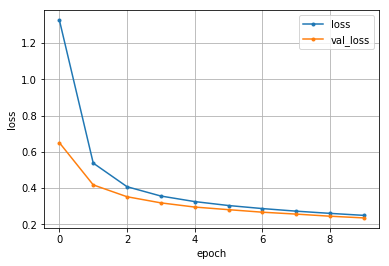

In [18]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

# lossのグラフ
plt.plot(range(epochs), loss, marker='.', label='loss')
plt.plot(range(epochs), val_loss, marker='.', label='val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

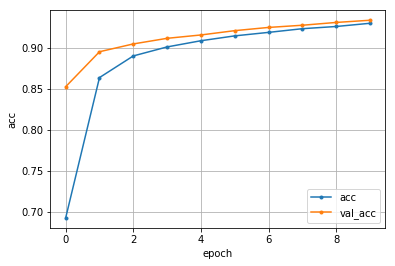

In [19]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']

# accuracyのグラフ
plt.plot(range(epochs), acc, marker='.', label='acc')
plt.plot(range(epochs), val_acc, marker='.', label='val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [20]:
#accの中身を表示 (10 epoch分のデータが入っている)
acc

[0.6927083333333334,
 0.8635416666666667,
 0.8898958333333333,
 0.9008541666666666,
 0.9083958333333333,
 0.9143125,
 0.9185625,
 0.9230416666666666,
 0.9257291666666667,
 0.9296458333333333]

In [0]:
# 結果の保存先を作成
mnist_results_dir = 'mnist_results'
if not os.path.exists(mnist_results_dir):os.mkdir(mnist_results_dir)

#pandasでaccとval_accをresult.csvに保存
df = pd.DataFrame({"accuracy" : (acc), "validation_accuracy" : (val_acc)})
df.to_csv("mnist_results/mnist_MLP_result.csv")

In [0]:
#モデルをjsonファイルに保存、重みを.h5として保存
model_json_str = model.to_json()
open("mnist_results/mnist_mlp_model.json", "w").write(model_json_str)
model.save_weights("mnist_results/mnist_MLP_weights.h5");

In [23]:
# 正誤表
print('Cross tabulation')
y_pred = model.predict_classes(X_test)
pd.crosstab(y_pred, y_test)

#列：実際の数字
#行：予想した数字
#予想した数字が正しければ、対角部分にカウントされる。

Cross tabulation


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,964,0,11,2,2,7,12,2,7,11
1,0,1114,5,1,5,2,3,10,5,8
2,1,2,938,17,4,3,5,25,6,1
3,2,3,16,933,0,36,0,5,26,11
4,0,1,13,0,913,3,11,5,9,25
5,3,2,0,22,0,798,13,0,19,7
6,6,3,8,2,8,16,910,0,15,1
7,1,1,13,15,2,4,1,957,11,14
8,3,9,24,12,6,16,3,2,872,6


In [25]:
test_wrong = sum(1 for i in zip(y_pred, y_test) if i[0] != i[1]) #条件に一致したら1を出力して、最後に足し合わせる
print("間違った画像の数は",test_wrong,"個です")

間違った画像の数は 676 個です


In [24]:
print(y_pred[0:30])
print(y_test[0:30])

[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]
